In [ ]:
## Importing required libraries ##

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import statsmodels.api as sm
import sklearn.metrics as skm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Reading the dataset
df = pd.read_excel('C:/Users/Admin/OneDrive/Desktop/Final/DS_Crop_Production_Prediction/FAOSTAT_data.xlsx')
df.head()


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2019,2019,ha,29203.0,A,Official figure,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2019,2019,kg/ha,1308.3,A,Official figure,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5510,Production,1371,"Almonds, in shell",2019,2019,t,38205.0,A,Official figure,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2020,2020,ha,22134.0,A,Official figure,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2020,2020,kg/ha,1775.9,A,Official figure,NaN


In [3]:
df.tail()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
224642,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,22221.01,"Whole milk, evaporated",2019,2019,t,5010.21,I,Imputed value,NaN
224643,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,22221.01,"Whole milk, evaporated",2020,2020,t,4795.70,I,Imputed value,NaN
224644,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,22221.01,"Whole milk, evaporated",2021,2021,t,4921.05,I,Imputed value,NaN
224645,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,22221.01,"Whole milk, evaporated",2022,2022,t,4966.37,I,Imputed value,NaN
224646,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,24212.02,Wine,2019,2019,t,NaN,A,Official figure,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224647 entries, 0 to 224646
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       224647 non-null  object 
 1   Domain            224647 non-null  object 
 2   Area Code (M49)   224647 non-null  int64  
 3   Area              224647 non-null  object 
 4   Element Code      224647 non-null  int64  
 5   Element           224647 non-null  object 
 6   Item Code (CPC)   224642 non-null  object 
 7   Item              224647 non-null  object 
 8   Year Code         224647 non-null  int64  
 9   Year              224647 non-null  int64  
 10  Unit              224645 non-null  object 
 11  Value             218130 non-null  float64
 12  Flag              224643 non-null  object 
 13  Flag Description  224634 non-null  object 
 14  Note              5098 non-null    object 
dtypes: float64(1), int64(4), object(10)
memory usage: 25.7+ MB


In [5]:
df.shape

(224647, 15)

#Pre-processing of data 


In [6]:
#Checking for null values
df.isna().sum()


Domain Code              0
Domain                   0
Area Code (M49)          0
Area                     0
Element Code             0
Element                  0
Item Code (CPC)          5
Item                     0
Year Code                0
Year                     0
Unit                     2
Value                 6517
Flag                     4
Flag Description        13
Note                219549
dtype: int64

In [7]:
df.isna().sum()/df.shape[0]*100

Domain Code          0.000000
Domain               0.000000
Area Code (M49)      0.000000
Area                 0.000000
Element Code         0.000000
Element              0.000000
Item Code (CPC)      0.002226
Item                 0.000000
Year Code            0.000000
Year                 0.000000
Unit                 0.000890
Value                2.900996
Flag                 0.001781
Flag Description     0.005787
Note                97.730662
dtype: float64

In [8]:
#Dealing with null values

#df[df['Flag'].isna()]
#df['Flag'].fillna(0, inplace=True)
#df['Flag'].isna().sum()

#Checking for duplicates
df.duplicated().sum()

np.int64(0)

In [9]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("**"*10)

Domain Code
QCL    224647
Name: count, dtype: int64
********************
Domain
Crops and livestock products    224647
Name: count, dtype: int64
********************
Area
China               2640
China, mainland     2504
Mexico              2181
T�rkiye             2141
Morocco             1970
                    ... 
Tuvalu               203
Kiribati             189
Tokelau              157
Faroe Islands        140
Marshall Islands      23
Name: count, Length: 200, dtype: int64
********************
Element
Production                       86382
Yield                            51566
Area harvested                   50309
Producing Animals/Slaughtered    18059
Stocks                            8809
Yield/Carcass Weight              6307
Milk Animals                      2146
Laying                            1069
Name: count, dtype: int64
********************
Item Code (CPC)
231.00      4546
21121.00    2906
21111.01    2900
1290.90     2821
2211.00     2805
            ... 
2121.02  

In [10]:
#Dropping inappropriate entries and non useful features

df['Element'].value_counts()

Element
Production                       86382
Yield                            51566
Area harvested                   50309
Producing Animals/Slaughtered    18059
Stocks                            8809
Yield/Carcass Weight              6307
Milk Animals                      2146
Laying                            1069
Name: count, dtype: int64

In [11]:
df.drop(df[df['Element'] == 'Total'].index, inplace=True)

In [12]:
df.drop(df[['Domain', 'Domain Code']], axis=1, inplace=True)

In [ ]:
#Checking for outliers

<Axes: >

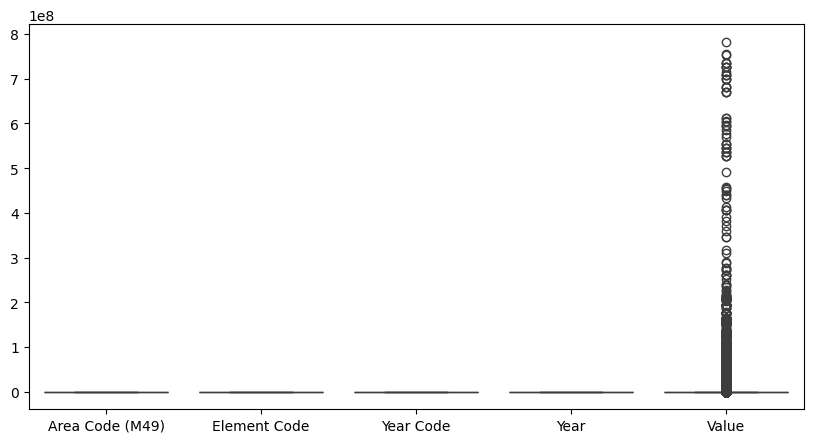

In [13]:
plt.figure(figsize=(10, 5))
sns.boxplot(df)

EXPLORATORY DATA ANALYSIS (EDA) 

In [14]:
df.describe()


,Area Code (M49),Element Code,Year Code,Year,Value
count,224647.000000,224647.000000,224647.000000,224647.000000,2.181300e+05
mean,426.797932,5407.125285,2020.971658,2020.971658,8.984848e+05
std,254.501789,101.321826,1.403592,1.403592,1.201902e+07
min,4.000000,5111.000000,2019.000000,2019.000000,0.000000e+00
25%,203.000000,5312.000000,2020.000000,2020.000000,9.370000e+02
50%,414.000000,5412.000000,2021.000000,2021.000000,7.228200e+03
75%,643.000000,5510.000000,2022.000000,2022.000000,5.135000e+04
max,894.000000,5513.000000,2023.000000,2023.000000,7.825858e+08


In [15]:
df.describe(include="object")

,Area,Element,Item Code (CPC),Item,Unit,Flag,Flag Description,Note
count,224647,224647,224642,224647,224645,224643,224634,5098
unique,200,8,277,276,11,5,5,1
top,China,Production,231,"Hen eggs in shell, fresh",t,A,Official figure,Unofficial figure
freq,2640,86382,4546,4546,85254,106690,106690,5098


In [16]:
np.mean(df['Value'])

np.float64(898484.8358923119)

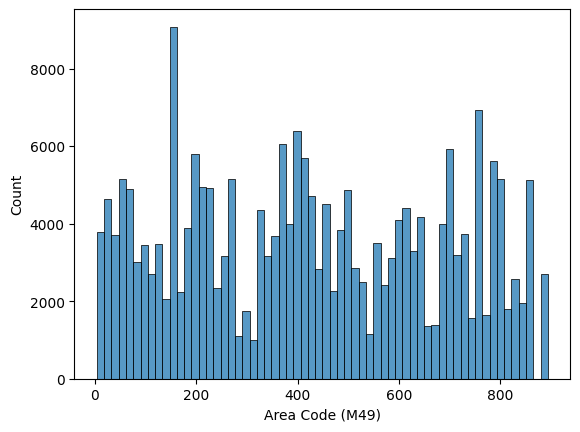

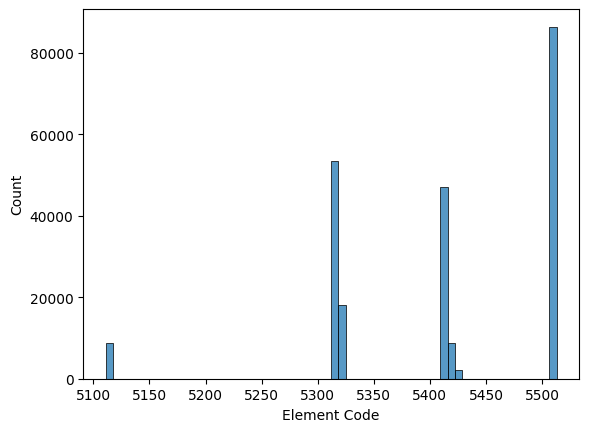

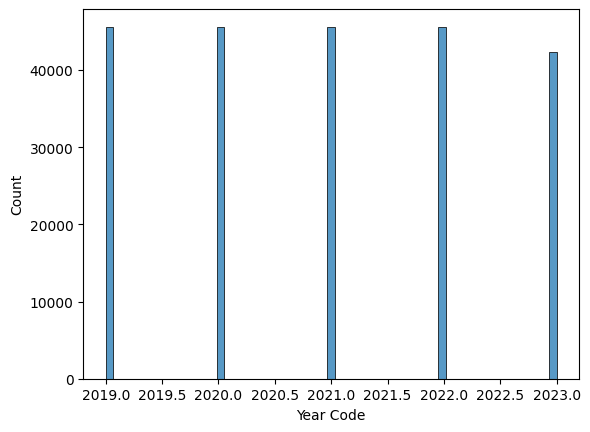

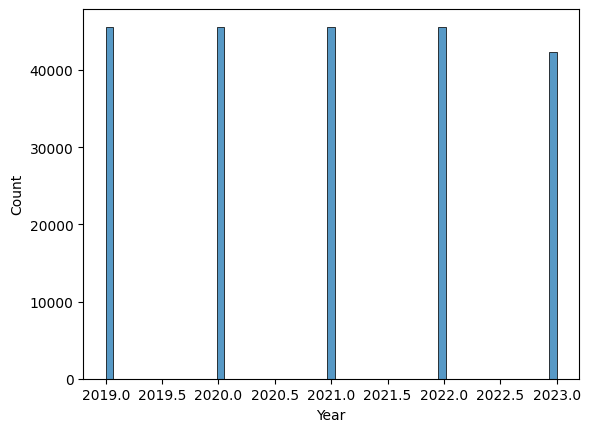

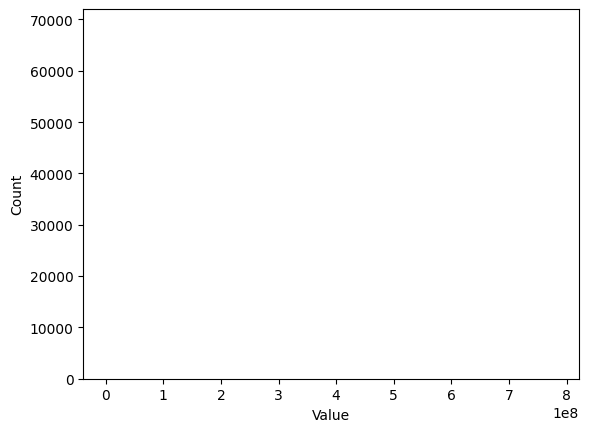

In [17]:
#histogram to understand the distribution


for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

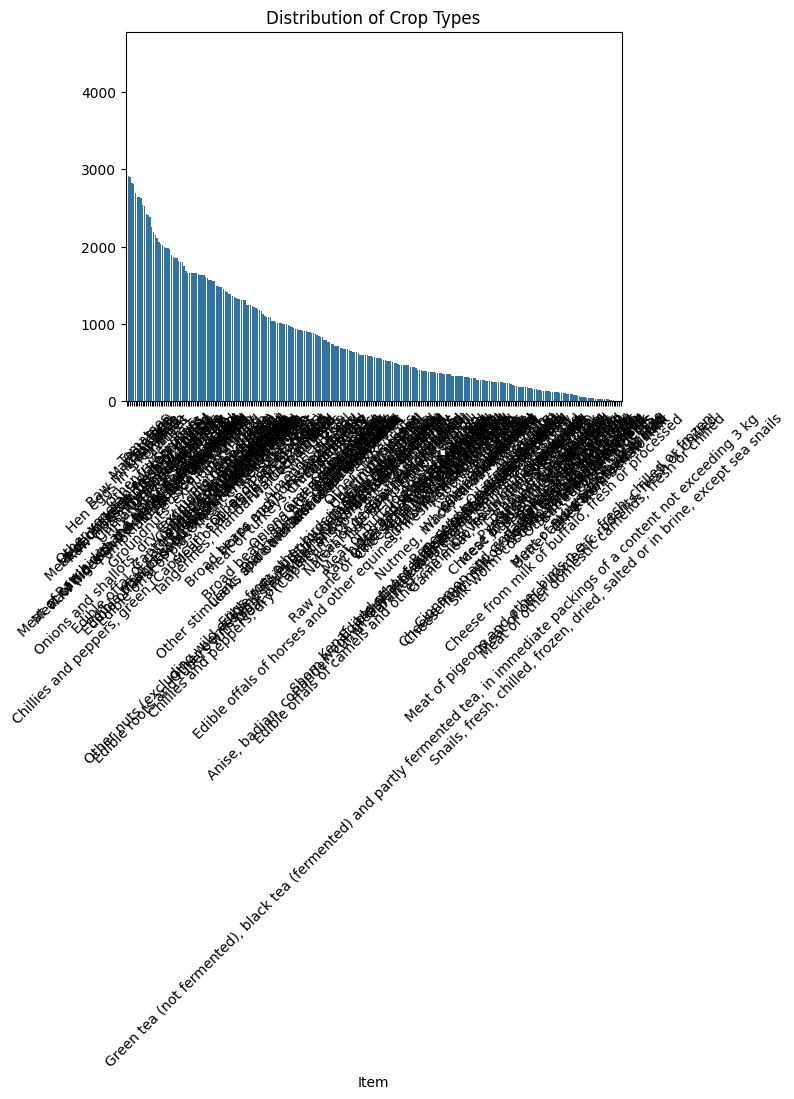

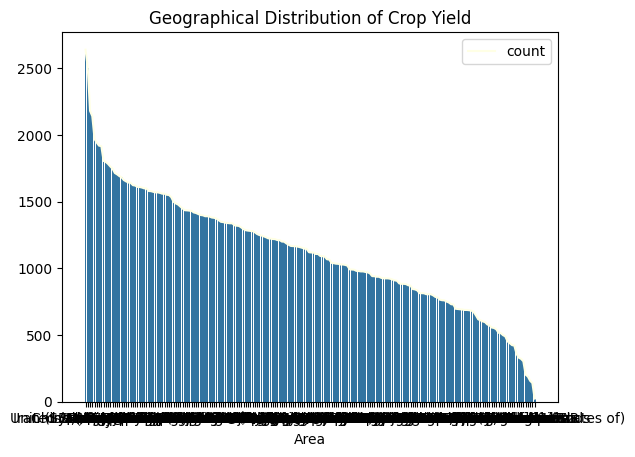

In [18]:
import geopandas as gpd


# Analyze crop types
crop_counts = df['Item'].value_counts()
sns.barplot(x=crop_counts.index, y=crop_counts.values)
plt.title("Distribution of Crop Types")
plt.xticks(rotation=45)
plt.show()

# Geographical data visualization
#geo_data = gpd.read_file("FAOSTAT_data.xlsx")  # Replace with your shape file
crop_counts = df['Area'].value_counts()
sns.barplot(x=crop_counts.index, y=crop_counts.values)
#merged_data = geo_data.merge(df, on="Area")

# Plot geographical crop distribution
crop_counts.plot(column="Item", legend=True, cmap="YlGn")
plt.title("Geographical Distribution of Crop Yield")
plt.show()
